In [1]:
import json
def read_data(path):
    # read meta data
    with open(path, 'r') as fp:
        products = json.load(fp)
        return products

In [2]:
import numpy as np
import pandas as pd

products_json = read_data("data/meta.json")
# initilize object arrays
product_id = np.empty((len(products_json['meta'])), dtype=object)
brand = np.empty((len(products_json['meta'])), dtype=object)
category = np.empty((len(products_json['meta'])), dtype=object)
subcategory = np.empty((len(products_json['meta'])), dtype=object)
product_name = np.empty((len(products_json['meta'])), dtype=object)

# collect values to numpy array
for index in range(len(products_json['meta'])):
    product_id[index] = products_json['meta'][index]['productid']
    brand[index] = products_json['meta'][index]['brand']
    category[index] = products_json['meta'][index]['category']
    subcategory[index] = products_json['meta'][index]['subcategory']
    product_name[index] = products_json['meta'][index]['name']

# write data into pandas DataFrame
products = pd.DataFrame()
products['productid'] = product_id
products['brand'] = brand
products['category'] = category
products['subcategory'] = subcategory
products['productname'] = product_name
del product_id, brand, category, subcategory, product_name
products

,productid,brand,category,subcategory,productname
0,HBV00000AX6LR,Palette,Kişisel Bakım,Saç Bakımı,Palette Kalıcı Doğal Renkler 10-4 PAPATYA
1,HBV00000BSAQG,Best,Pet Shop,Kedi,Best Pet Jöle İçinde Parça Etli Somonlu Konser...
2,HBV00000JUHBA,Tarım Kredi,Temel Gıda,"Bakliyat, Pirinç, Makarna",Türkiye Tarım Kredi Koop.Yeşil Mercimek 1 kg
3,HBV00000NE0QI,Namet,"Et, Balık, Şarküteri",Şarküteri,Namet Fıstıklı Macar Salam 100 gr
4,HBV00000NE0UQ,Muratbey,Kahvaltılık ve Süt,Peynir,Muratbey Burgu Peyniri 250 gr
...,...,...,...,...,...
10231,ZYHPREISBBKL008,Reis,Temel Gıda,"Bakliyat, Pirinç, Makarna",Reis Gönen Baldo Pirinç 1 kg
10232,ZYNES11470137,Nescafe,İçecekler,Kahve,Nescafé Classic Çözünebilir Kahve 200gr Ekopaket
10233,ZYPAREX1909309,Parex,Ev Bakım ve Temizlik,Ev Temizlik Ürünleri,Parex Powerball Çizmez Ovma Teli
10234,ZYPAREX2107986,Parex,Ev Bakım ve Temizlik,Yüzey Temizleyiciler,Parex Tornado Döner Başlıklı Temizlik Seti


In [3]:
products.isnull().any()

productid      True
brand          True
category       True
subcategory    True
productname    True
dtype: bool

In [4]:
products[products['productid'].isna()]

,productid,brand,category,subcategory,productname
5092,None,None,None,None,None


In [5]:
products[products['brand'].isna()]

,productid,brand,category,subcategory,productname
8,HBV00000NVZCG,None,Meyve ve Sebze,Meyve,Granny Smith Elma 500 gr
9,HBV00000OEL9Q,None,Fırın,Ekmekler,Ekşi Mayalı Ekmek 1 Kg
32,HBV00000SP84O,None,Temel Gıda,"Bakliyat, Pirinç, Makarna",Beypazarı Kinoalı Erişte 350 gr
38,HBV00000TIRUD,None,Meyve ve Sebze,Meyve,Kavun Galya 2 kg
72,HBV00000NVZAO,None,"Et, Balık, Şarküteri",Balık ve Deniz Mahsülleri,Çipura (400-600 gr)
...,...,...,...,...,...
10076,HBV00000PV9I1,None,Kişisel Bakım,Saç Bakımı,Intense Saç Boyası Karamel Kahve 6-32
10111,HBV00000O2SH9,None,Meyve ve Sebze,Meyve,Kivi Organik 500 g
10117,HBV00000PNGHS,None,Atıştırmalık,Cips,Pringles Cheesy Cheese 165 Gr
10184,HBV00000O2SD5,None,Meyve ve Sebze,Sebze,Açık Mantar 250 gr


In [6]:
products[products['category'].isna()]

,productid,brand,category,subcategory,productname
5092,None,None,None,None,None


In [7]:
products[products['subcategory'].isna()]

,productid,brand,category,subcategory,productname
5092,None,None,None,None,None


In [8]:
products[products['productname'].isna()]

,productid,brand,category,subcategory,productname
5092,None,None,None,None,None


In [9]:
products.iloc[5092]

productid      None
brand          None
category       None
subcategory    None
productname    None
Name: 5092, dtype: object

In [10]:
# remove 5092 index because all values are null
products.drop([5092], inplace=True)
products.isnull().any()

productid      False
brand           True
category       False
subcategory    False
productname    False
dtype: bool

As I expected only brand has null values

In [11]:
products

,productid,brand,category,subcategory,productname
0,HBV00000AX6LR,Palette,Kişisel Bakım,Saç Bakımı,Palette Kalıcı Doğal Renkler 10-4 PAPATYA
1,HBV00000BSAQG,Best,Pet Shop,Kedi,Best Pet Jöle İçinde Parça Etli Somonlu Konser...
2,HBV00000JUHBA,Tarım Kredi,Temel Gıda,"Bakliyat, Pirinç, Makarna",Türkiye Tarım Kredi Koop.Yeşil Mercimek 1 kg
3,HBV00000NE0QI,Namet,"Et, Balık, Şarküteri",Şarküteri,Namet Fıstıklı Macar Salam 100 gr
4,HBV00000NE0UQ,Muratbey,Kahvaltılık ve Süt,Peynir,Muratbey Burgu Peyniri 250 gr
...,...,...,...,...,...
10231,ZYHPREISBBKL008,Reis,Temel Gıda,"Bakliyat, Pirinç, Makarna",Reis Gönen Baldo Pirinç 1 kg
10232,ZYNES11470137,Nescafe,İçecekler,Kahve,Nescafé Classic Çözünebilir Kahve 200gr Ekopaket
10233,ZYPAREX1909309,Parex,Ev Bakım ve Temizlik,Ev Temizlik Ürünleri,Parex Powerball Çizmez Ovma Teli
10234,ZYPAREX2107986,Parex,Ev Bakım ve Temizlik,Yüzey Temizleyiciler,Parex Tornado Döner Başlıklı Temizlik Seti


In [12]:
# process for evetns.json
events_json = read_data("data/events.json")

event = np.empty((len(events_json['events'])), dtype=object)
sessionid = np.empty((len(events_json['events'])), dtype=object)
eventtime = np.empty((len(events_json['events'])), dtype=object)
price = np.empty((len(events_json['events'])), dtype=object)
productid = np.empty((len(events_json['events'])), dtype=object)

for index in range(len(events_json['events'])):
    event[index] = events_json['events'][index]['event']
    sessionid[index] = events_json['events'][index]['sessionid']
    eventtime[index] = events_json['events'][index]['eventtime']
    price[index] = events_json['events'][index]['price']
    productid[index] = events_json['events'][index]['productid']

events = pd.DataFrame()
events['event'] = event
events['sessionid'] = sessionid
events['eventtime'] = eventtime
events['price'] = price
events['productid'] = productid
del event, sessionid, eventtime, price, productid
events

,event,sessionid,eventtime,price,productid
0,cart,a0655eee-1267-4820-af21-ad8ac068ff7a,2020-06-01T08:59:16.406Z,14.48,HBV00000NVZE8
1,cart,d2ea7bd3-9235-4a9f-a9ea-d7f296e71318,2020-06-01T08:59:46.580Z,49.90,HBV00000U2B18
2,cart,5e594788-78a0-44dd-8e66-37022d48f691,2020-06-01T08:59:33.308Z,1.99,OFIS3101-080
3,cart,fdfeb652-22fa-4153-b9b5-4dfa0dcaffdf,2020-06-01T08:59:31.911Z,2.25,HBV00000NVZBW
4,cart,9e9d4f7e-898c-40fb-aae9-256c40779933,2020-06-01T08:59:33.888Z,9.95,HBV00000NE0T4
...,...,...,...,...,...
387651,cart,0ce386d3-f9ae-46b1-a018-baa5ea91be0c,2020-06-15T03:55:05.322Z,19.90,HBV00000OE884
387652,cart,69be07e4-737d-4935-b2eb-e02ecd94986b,2020-06-15T03:56:50.064Z,9.95,HBV00000OE8AU
387653,cart,25f6960c-0144-419d-8761-2b539c75c9c9,2020-06-15T03:03:23.859Z,21.95,HBV00000PQM1C
387654,cart,eebd42a5-2d95-41b9-bc10-83db56ba3989,2020-06-15T03:29:54.865Z,17.50,HBV00000NFHXT


In [13]:
events.isnull().any()

event        False
sessionid    False
eventtime    False
price         True
productid     True
dtype: bool

In [14]:
events[events['price'].isna()]

,event,sessionid,eventtime,price,productid
6421,cart,fc1ba51a-224b-4818-bff0-fa2dc1c93acd,2020-06-01T12:32:22.012Z,None,None
86682,cart,967f0239-a7f0-4ca9-b31e-92ad4e0798d7,2020-06-01T21:41:43.474Z,None,None
193736,cart,78ca9e26-f4ee-4fb3-a166-b124fdc32426,2020-06-03T21:17:37.145Z,None,None
197084,cart,25f19afd-6cb2-46dd-9ebd-0fd97cf10b63,2020-06-03T19:03:31.293Z,None,None
343563,cart,cd86710a-f292-49e7-b48e-6b57d51755ae,2020-06-06T21:27:48.620Z,None,None
354628,cart,1e50875d-c395-4e6d-8ea4-52e2bcb4975a,2020-06-04T06:08:54.849Z,None,None


In [15]:
events[events['productid'].isna()]

,event,sessionid,eventtime,price,productid
6421,cart,fc1ba51a-224b-4818-bff0-fa2dc1c93acd,2020-06-01T12:32:22.012Z,None,None
86682,cart,967f0239-a7f0-4ca9-b31e-92ad4e0798d7,2020-06-01T21:41:43.474Z,None,None
193736,cart,78ca9e26-f4ee-4fb3-a166-b124fdc32426,2020-06-03T21:17:37.145Z,None,None
197084,cart,25f19afd-6cb2-46dd-9ebd-0fd97cf10b63,2020-06-03T19:03:31.293Z,None,None
343563,cart,cd86710a-f292-49e7-b48e-6b57d51755ae,2020-06-06T21:27:48.620Z,None,None
354628,cart,1e50875d-c395-4e6d-8ea4-52e2bcb4975a,2020-06-04T06:08:54.849Z,None,None


In [16]:
events.groupby("sessionid").count()

,event,eventtime,price,productid
sessionid,,,,
000280f4-62fc-4dcd-b51d-c66ac14d7d8c,1,1,1,1
0002e53b-1f60-4309-8380-31ca03de51f8,2,2,2,2
0002ef34-6bee-4953-874b-8298ec26b625,2,2,2,2
000618de-d415-408c-863e-6124db43f529,4,4,4,4
000770d6-c2d4-4ad2-bb2c-b35274bc5e7e,1,1,1,1
...,...,...,...,...
fffb5e6a-2676-4cd9-b4e4-ab8b6621e0fe,6,6,6,6
fffbae5f-8102-4a14-84d7-6c11c724cf8d,2,2,2,2
fffbba74-6999-460f-bd5f-70eaebe689cf,20,20,20,20


In [17]:
events.groupby("sessionid").value_counts()

sessionid                             event  eventtime                 price  productid    
000280f4-62fc-4dcd-b51d-c66ac14d7d8c  cart   2020-06-07T14:30:58.804Z  9.99   HBV00000NE1WT    1
0002e53b-1f60-4309-8380-31ca03de51f8  cart   2020-06-06T17:52:42.480Z  5.50   HBV00000NE1LU    1
                                             2020-06-06T17:51:18.003Z  22.48  HBV00000NVZGQ    1
0002ef34-6bee-4953-874b-8298ec26b625  cart   2020-06-02T06:58:52.021Z  15.50  HBV00000OEL9W    1
                                             2020-06-02T06:58:25.529Z  3.75   HBV00000OELAO    1
                                                                                              ..
ffffcd3c-da03-4667-9c75-9fcafb609c9e  cart   2020-06-09T15:12:52.414Z  4.45   HBV00000TIRUB    1
                                             2020-06-09T15:12:50.894Z  4.45   HBV00000TIRUB    1
                                             2020-06-09T15:12:45.109Z  4.95   HBV00000TIRU5    1
                                   

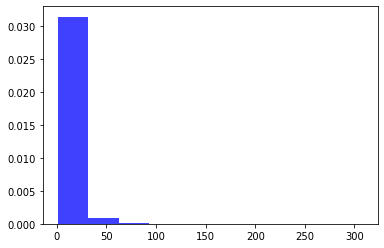

In [18]:
import matplotlib.pyplot as plt

plt.hist(events.groupby("sessionid").count().productid.values, density=True, facecolor='b', alpha=0.75)
plt.show() 

In [19]:
events.groupby(["sessionid"]).agg({"productid": 'count'}).reset_index()

,sessionid,productid
0,000280f4-62fc-4dcd-b51d-c66ac14d7d8c,1
1,0002e53b-1f60-4309-8380-31ca03de51f8,2
2,0002ef34-6bee-4953-874b-8298ec26b625,2
3,000618de-d415-408c-863e-6124db43f529,4
4,000770d6-c2d4-4ad2-bb2c-b35274bc5e7e,1
...,...,...
54437,fffb5e6a-2676-4cd9-b4e4-ab8b6621e0fe,6
54438,fffbae5f-8102-4a14-84d7-6c11c724cf8d,2
54439,fffbba74-6999-460f-bd5f-70eaebe689cf,20
54440,fffd3c61-2f71-4437-986c-e1c30ef5b5fe,43


In [20]:
events.isna().value_counts()

event  sessionid  eventtime  price  productid
False  False      False      False  False        387650
                             True   True              6
dtype: int64

In [21]:
events

,event,sessionid,eventtime,price,productid
0,cart,a0655eee-1267-4820-af21-ad8ac068ff7a,2020-06-01T08:59:16.406Z,14.48,HBV00000NVZE8
1,cart,d2ea7bd3-9235-4a9f-a9ea-d7f296e71318,2020-06-01T08:59:46.580Z,49.90,HBV00000U2B18
2,cart,5e594788-78a0-44dd-8e66-37022d48f691,2020-06-01T08:59:33.308Z,1.99,OFIS3101-080
3,cart,fdfeb652-22fa-4153-b9b5-4dfa0dcaffdf,2020-06-01T08:59:31.911Z,2.25,HBV00000NVZBW
4,cart,9e9d4f7e-898c-40fb-aae9-256c40779933,2020-06-01T08:59:33.888Z,9.95,HBV00000NE0T4
...,...,...,...,...,...
387651,cart,0ce386d3-f9ae-46b1-a018-baa5ea91be0c,2020-06-15T03:55:05.322Z,19.90,HBV00000OE884
387652,cart,69be07e4-737d-4935-b2eb-e02ecd94986b,2020-06-15T03:56:50.064Z,9.95,HBV00000OE8AU
387653,cart,25f6960c-0144-419d-8761-2b539c75c9c9,2020-06-15T03:03:23.859Z,21.95,HBV00000PQM1C
387654,cart,eebd42a5-2d95-41b9-bc10-83db56ba3989,2020-06-15T03:29:54.865Z,17.50,HBV00000NFHXT


In [22]:
data = {"sessionid": events.sessionid.values, "productid": events.productid.values}
dataset = pd.DataFrame(data=data, dtype=object)
dataset

,sessionid,productid
0,a0655eee-1267-4820-af21-ad8ac068ff7a,HBV00000NVZE8
1,d2ea7bd3-9235-4a9f-a9ea-d7f296e71318,HBV00000U2B18
2,5e594788-78a0-44dd-8e66-37022d48f691,OFIS3101-080
3,fdfeb652-22fa-4153-b9b5-4dfa0dcaffdf,HBV00000NVZBW
4,9e9d4f7e-898c-40fb-aae9-256c40779933,HBV00000NE0T4
...,...,...
387651,0ce386d3-f9ae-46b1-a018-baa5ea91be0c,HBV00000OE884
387652,69be07e4-737d-4935-b2eb-e02ecd94986b,HBV00000OE8AU
387653,25f6960c-0144-419d-8761-2b539c75c9c9,HBV00000PQM1C
387654,eebd42a5-2d95-41b9-bc10-83db56ba3989,HBV00000NFHXT


In [23]:
sessions = dataset.sessionid.unique()
productids = dataset.productid.unique()
matrix = np.zeros(shape=(sessions.shape[0], productids.shape[0]))
for session_step, ses in enumerate(sessions):
    session_products = dataset[dataset["sessionid"] == ses].productid.unique()
    for p in session_products:
        idx = np.where(productids == p)
        matrix[session_step][idx] = 1
matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
dataset2 = pd.DataFrame(data=matrix, columns=productids, index=sessions, dtype=int)
dataset2

,HBV00000NVZE8,HBV00000U2B18,OFIS3101-080,HBV00000NVZBW,HBV00000NE0T4,HBV00000NE0T6,HBV00000O2SDO,HBV00000U2B4I,HBV00000NVZBI,HBV000008SJOK,...,ZYUZAY1074,HBV00000QX2AX,OFISMAS415,HBV000009GL26,HBV00000C3V6L,HBV00000U276B,HBV00000EL878,HBV00000NE102,HBV00000UIYE5,HBV00000PV7M3
a0655eee-1267-4820-af21-ad8ac068ff7a,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d2ea7bd3-9235-4a9f-a9ea-d7f296e71318,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5e594788-78a0-44dd-8e66-37022d48f691,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fdfeb652-22fa-4153-b9b5-4dfa0dcaffdf,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9e9d4f7e-898c-40fb-aae9-256c40779933,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f5668d65-04d7-4553-b42d-cd2be8c3a5c4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7c5361ba-255b-4d5c-8443-8ada934a760d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86663b4d-827e-4d23-9949-31750c17b7cc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8fc5e99c-3655-45b2-99a9-47f7ff229fde,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
from sklearn.metrics.pairwise import cosine_similarity
scores = np.zeros(shape=(dataset2.shape[0]), dtype=np.float64)
current_session = dataset2.iloc[0].values
current_session_id = dataset2.index[0]

for i in range(scores.shape[0]):
    scores[i] = cosine_similarity([current_session], [dataset2.iloc[i].values])[0][0]

top_n:int = 5
similar_sessions = []
i:int = 0
while len(similar_sessions) < top_n:
    idx = np.argmax(scores)
    if current_session_id != dataset2.index[idx]:
        temp = {
            "session_id": dataset2.index[idx],
            "similarity": scores[idx],
            "items": []
        }
        # find which column has 1 value
        item_indexes = np.where(dataset2.iloc[idx].values == 1)
        items = dataset2.columns[item_indexes]
        for item in items:
            temp["items"].append(item)
        similar_sessions.append(temp)
        scores[idx] = 0
        i += 1
    else:
        scores[idx] = 0

In [167]:
similar_sessions

[{'session_id': '8da2d794-e5f0-447a-b7a9-f2c2b7e69db1',
  'similarity': 0.2369395511036369,
  'items': ['HBV00000NVZE8',
   'HBV00000NE0RM',
   'HBV00000NVZ9S',
   'HBV00000PUQCU',
   'HBV00000OE7D4',
   'HBV00000O3680',
   'HBV00000OE7FS',
   'HBV00000OE7B5',
   'HBV00000OE7UF',
   'HBV00000O2SDB',
   'HBV00000NVZDU',
   'HBV00000PV6O6',
   'HBV00000O3C6C',
   'HBV00000O3C6Z',
   'HBV00000NE0RJ',
   'HBV00000OELBY',
   'HBV00000NE24P',
   'HBV00000OE7BC',
   'HBV00000PVQ5D']},
 {'session_id': '56c30687-6958-4f67-ad74-eb3a92946e19',
  'similarity': 0.21516574145596756,
  'items': ['HBV00000OE7QQ',
   'HBV00000NVZ9S',
   'HBV00000OE7D4',
   'HBV00000OE7UF',
   'HBV00000OE7J7',
   'HBV00000P7QHN',
   'HBV00000O2SDB',
   'HBV00000PV6O6',
   'ZYPINAR153103445']},
 {'session_id': '50fdf41a-9554-46a8-a952-3736ccb25621',
  'similarity': 0.21516574145596756,
  'items': ['HBV00000NVZE8',
   'HBV00000OE7QQ',
   'HBV00000OE7D4',
   'HBV00000O3680',
   'HBV00000OE7UF',
   'HBV00000NVZAM',
   'HBV0

In [174]:
from collections import Counter

all_items = [item for ses in similar_sessions for item in ses["items"]]
results = Counter(all_items).most_common(top_n)
results

[('HBV00000OE7D4', 5),
 ('HBV00000PV6O6', 5),
 ('HBV00000NVZ9S', 3),
 ('HBV00000OE7UF', 3),
 ('HBV00000O2SDB', 3)]

In [198]:
# visualise current cart
cart = []
for curr in current_ses:
    item = products[products['productid'] == curr]
    cart.append(item.productname.values[0])
cart

['Dana Kıyma (%5-%7 Yağ) 250 gr',
 'Tadım Fındık İçi 200gr',
 'İthal Muz 500 gr',
 'Maydanoz',
 'Marul Adet',
 'Havuç 500 gr',
 'Semizotu',
 'Çipura (300-400 gr)',
 'Kasap Köfte 250 gr',
 'Balküpü Toz Şeker 1 kg',
 'Kuzu Kuşbaşı 500 gr',
 'Dereotu',
 'Carrefour Çörek Otu 70 gr',
 'Filiz Makarna Burgu 500 Gr',
 'İçim Şef %18 Krema 200 ml',
 'Dolmabiber 500 gr',
 'Karnabahar 500 gr',
 'Uno Premium Çavdarlı & Karabuğdaylı 350 Gr',
 'Muratbey Lor Peyniri 500 Gr',
 'Ulker Bıtter Cıkolata Kare 60 gr',
 'Carrefour Badem İçi 150 gr',
 'Ulker Bıtter %80 Cıkolata 60 gr',
 "Dr.Oetker 5'li Maya 50 gr",
 'Marmarabirlik Kuru Sele 381-410 3XS 400 gr',
 'Tat Hardal 230 gr',
 'Tahsildaroglu Klasik Peynir 525 gr',
 'Sütaş Babymix Sade 4x100 gr',
 'Koska 620 gr Tahin',
 'Carrefour Gönen Baldo Pirinç 1 kg',
 'Peyman Bahçeden Gün Kurusu 165G',
 'Heinz Ketçap Tatlı 250 Gr + Mayonez 215 Gr (Küçük)',
 'İçim Organik Yoğurt 750 gr',
 'Dana Çoban Kavurma 250 gr',
 'İçim Süt 4x1 L',
 'Reis Gönen Baldo Pirinç 1 kg

In [199]:
suggestions = []
for res in results:
    sug = products[products['productid'] == res[0]]
    suggestions.append(sug.productname.values[0])
suggestions

['Maydanoz', 'Dereotu', 'İthal Muz 500 gr', 'Havuç 500 gr', 'Semizotu']

In [31]:
#dataset2 = dataset2.drop(columns=["score"])

In [32]:
#dataset2.to_pickle("data/featured_data.pkl")

In [33]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54442 entries, a0655eee-1267-4820-af21-ad8ac068ff7a to d784e0c9-4b64-42e0-8c2a-74cb290a26d2
Columns: 10237 entries, HBV00000NVZE8 to score
dtypes: float64(1), int64(10236)
memory usage: 4.2+ GB
